# Name: Nandini Dhakad

The Spark Foundataion GRIPApril23

Data Science and Business Analytics Intern at The Spark Foundation

Task 6: Prediction using Decision Tree Algorithm

Create the Decision Tree classifier and visualize it graphically. 

Importing libraries

In [4]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

Loading data

In [4]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


description of dataset

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.drop(['Id'],inplace=True,axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

check missing values

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

visualisation of dataset

In [11]:
label_encoder=preprocessing.LabelEncoder()
df.Species=label_encoder.fit_transform(df.Species)
df.Species.value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


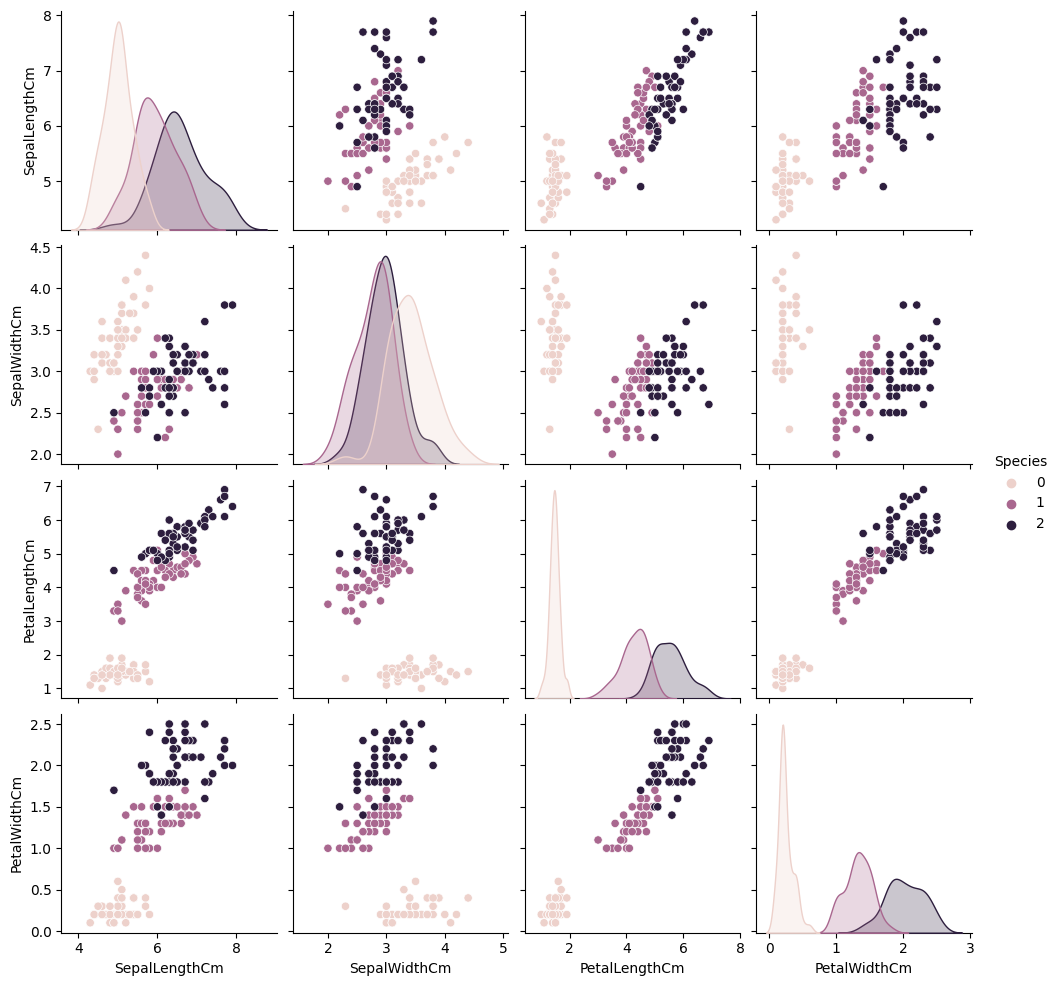

In [19]:
sns.pairplot(df,hue="Species")

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

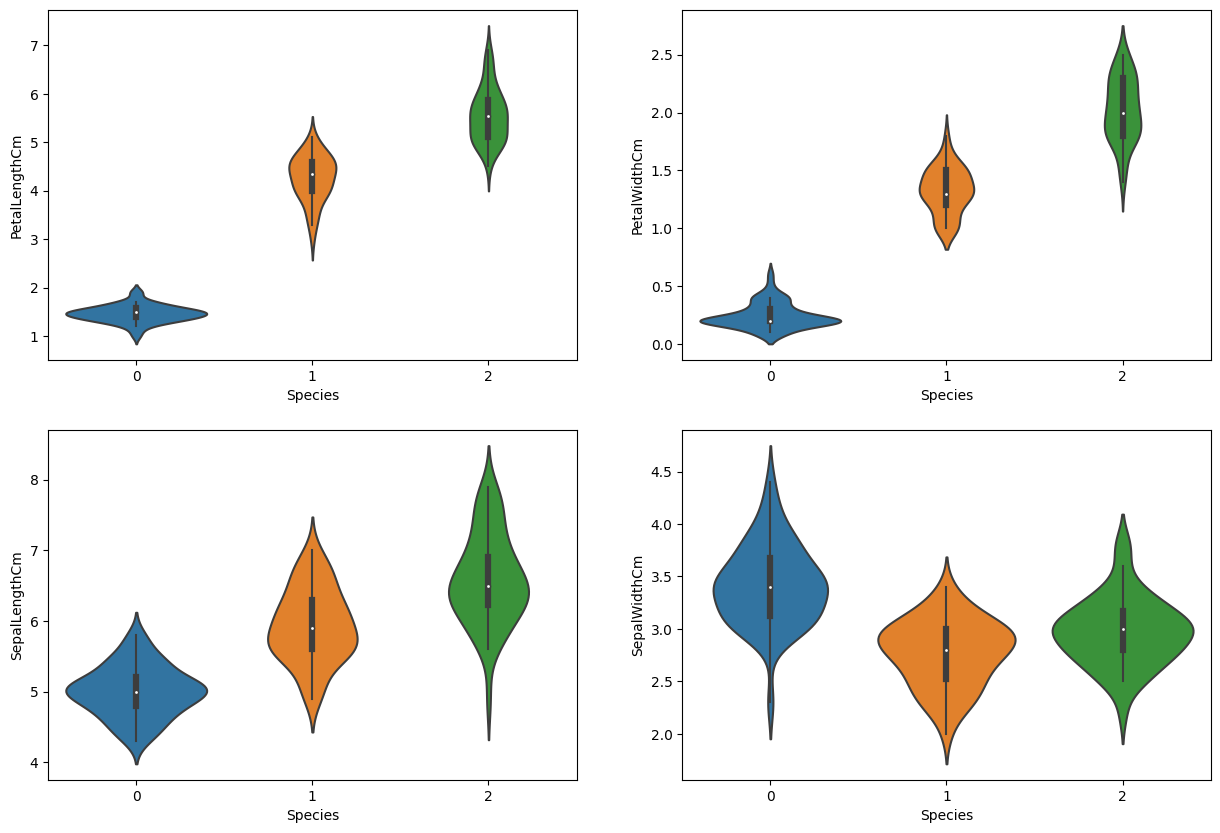

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species", y="PetalLengthCm",data=df)
plt.subplot(2,2,2)
sns.violinplot(x="Species", y="PetalWidthCm",data=df)
plt.subplot(2,2,3)
sns.violinplot(x="Species", y="SepalLengthCm",data=df)
plt.subplot(2,2,4)
sns.violinplot(x="Species", y="SepalWidthCm",data=df)

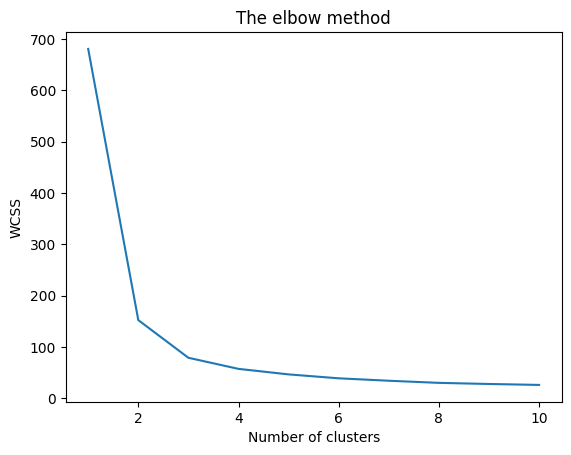

In [21]:
x=df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

No. of clusters=3

Applying KMeans

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

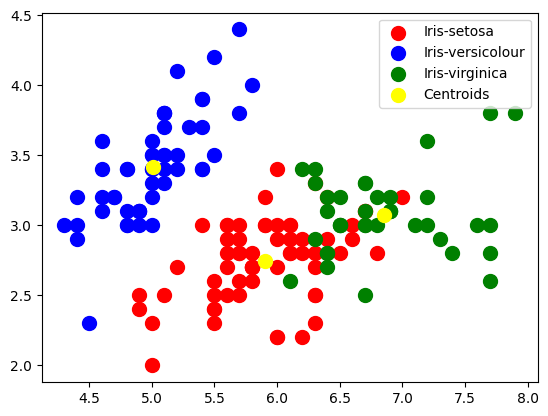

In [23]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [25]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]
x
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [27]:
y_train

62    1
23    0
26    0
48    0
2     0
     ..
71    1
12    0
50    1
7     0
70    1
Name: Species, Length: 120, dtype: int32

In [28]:
y_train.value_counts()

Species
0    42
2    40
1    38
Name: count, dtype: int64

Decision Tree

In [30]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


[Text(0.375, 0.875, 'x[2] <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

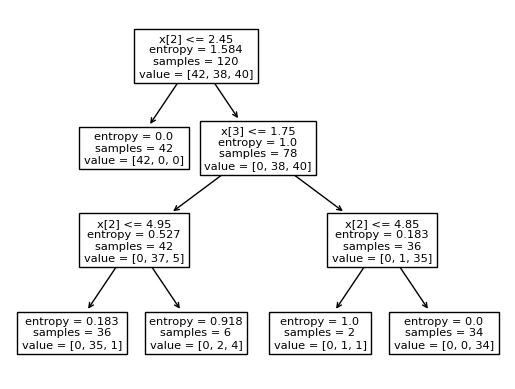

In [31]:
tree.plot_tree(model)

In [32]:
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['setosa','versicolor','virginica']

[Text(0.375, 0.875, 'PetalLengthCm <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'PetalWidthCm <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(0.25, 0.375, 'PetalLengthCm <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'PetalLengthCm <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]\nclass = virginica'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = virginica')]

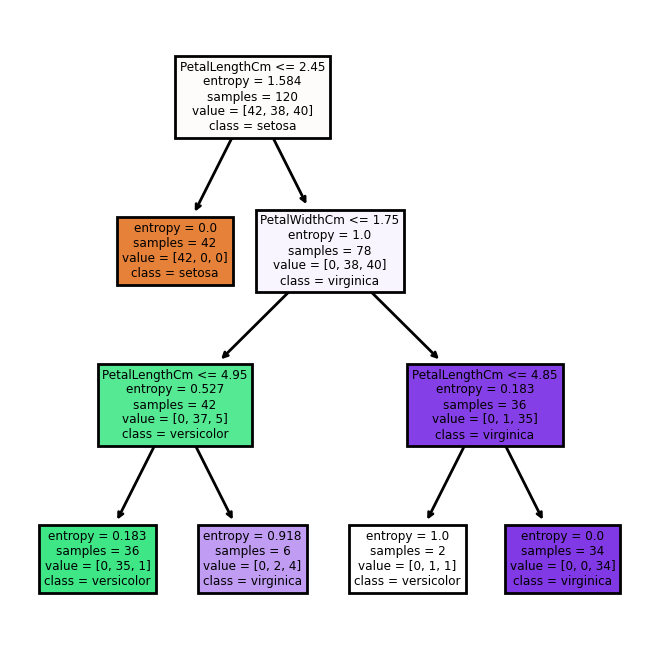

In [34]:
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=200)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [35]:
#Prediction on the data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    13
2     9
0     8
Name: count, dtype: int64

In [36]:
y_test
y_test.value_counts()

Species
1    12
2    10
0     8
Name: count, dtype: int64

In [37]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [38]:
np.mean(preds==y_test)

0.9666666666666667